In [ ]:
!pip install system-check

In [2]:
import numpy as np
# to store and analysis data in dataframes
import pandas as pd
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# python modules for data normalization and splitting
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
# python modules for creating training and testing ml algorithms
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# python modules for creating training and testing Neural Networks
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense
# evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score
import sys

In [3]:
data = pd.read_csv('D:/Kowsik/Studies/Project/archive/creditcard.csv')
data


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<Axes: title={'center': 'Correlation Matrix'}>

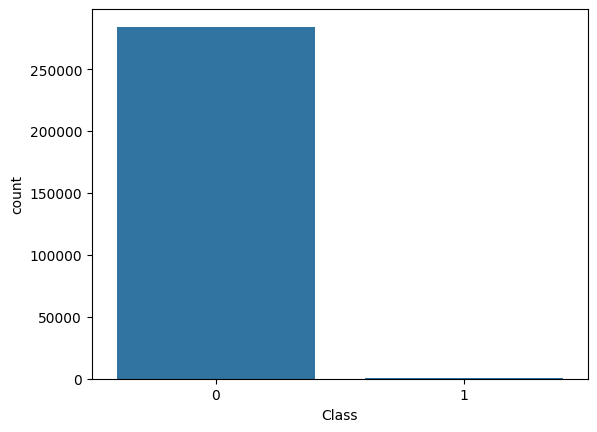

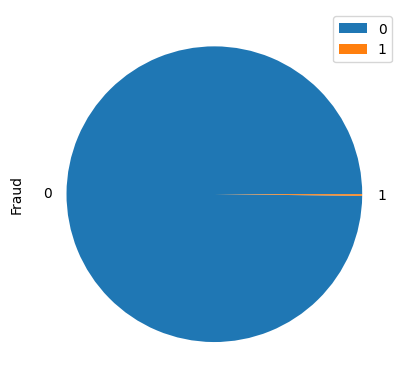

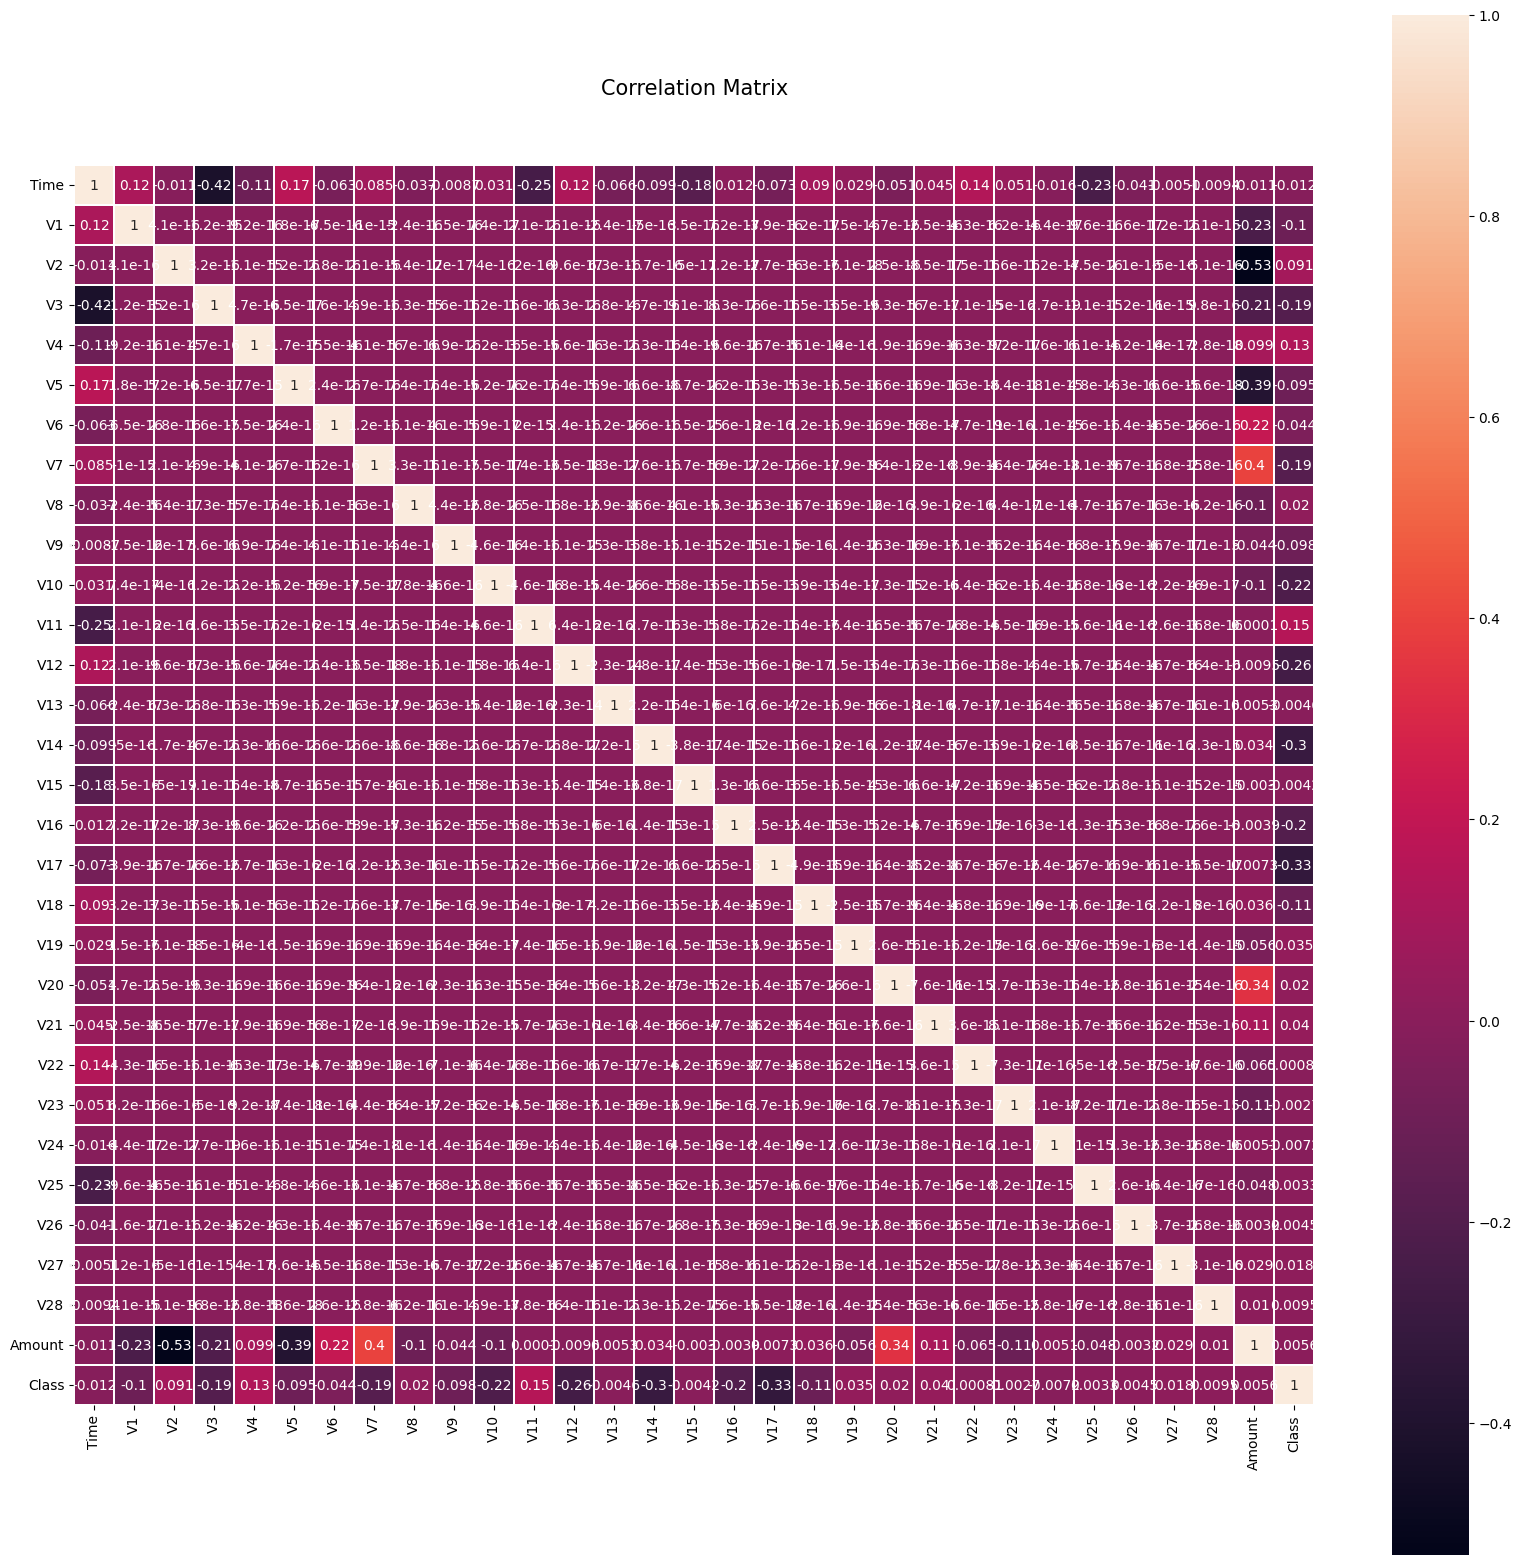

In [4]:
data.shape
data.info()
data.describe()
sns.countplot(x='Class', data=data)
print("Fraud: ",data.Class.sum()/data.Class.count())
Fraud_class = pd.DataFrame({'Fraud': data['Class']})
Fraud_class. apply(pd.value_counts). plot(kind='pie',subplots=True)
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
fraud.Amount.describe()
plt.figure(figsize=(20,20))
plt.title('Correlation Matrix', y=1.05, size=15)
sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True, linecolor='white', annot=True)

In [5]:
rs = RobustScaler()
data['Amount'] = rs.fit_transform(data['Amount'].values.reshape(-1, 1))
data['Time'] = rs.fit_transform(data['Time'].values.reshape(-1, 1))
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0


In [6]:
X = data.drop(['Class'], axis = 1)
Y = data["Class"]

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)
X_train
X_test
Y_test
def evaluate(Y_test, Y_pred):
    print("Accuracy: ",accuracy_score(Y_test, Y_pred))
    print("Precision: ",precision_score(Y_test, Y_pred))
    print("Recall: ",recall_score(Y_test, Y_pred))
    print("F1-Score: ",f1_score(Y_test, Y_pred))
    print("AUC score: ",roc_auc_score(Y_test, Y_pred))
    print(classification_report(Y_test, Y_pred, target_names = ['Normal', 'Fraud']))
    conf_matrix = confusion_matrix(Y_test, Y_pred)
    plt.figure(figsize =(6, 6))
    sns.heatmap(conf_matrix, xticklabels = ['Normal', 'Fraud'],
    yticklabels = ['Normal', 'Fraud'], annot = True, fmt ="d");
    plt.title("Confusion matrix")
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()


Accuracy:  0.9994557775359011
Precision:  0.6781609195402298
Recall:  0.9516129032258065
F1-Score:  0.7919463087248322
AUC score:  0.975560405918703
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56900
       Fraud       0.68      0.95      0.79        62

    accuracy                           1.00     56962
   macro avg       0.84      0.98      0.90     56962
weighted avg       1.00      1.00      1.00     56962



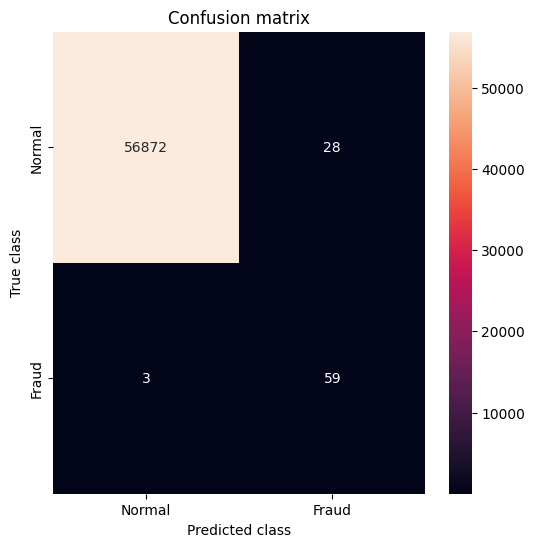

In [8]:
svm = SVC()
# Training SVC
svm.fit(X_train, Y_train)
# Testing SVC
Y_pred_svm = svm.predict(X_test)
# Evaluating SVC
evaluate(Y_pred_svm, Y_test)

Accuracy:  0.9995084442259752
Precision:  0.735632183908046
Recall:  0.927536231884058
F1-Score:  0.8205128205128205
AUC score:  0.9635659821118566
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56893
       Fraud       0.74      0.93      0.82        69

    accuracy                           1.00     56962
   macro avg       0.87      0.96      0.91     56962
weighted avg       1.00      1.00      1.00     56962



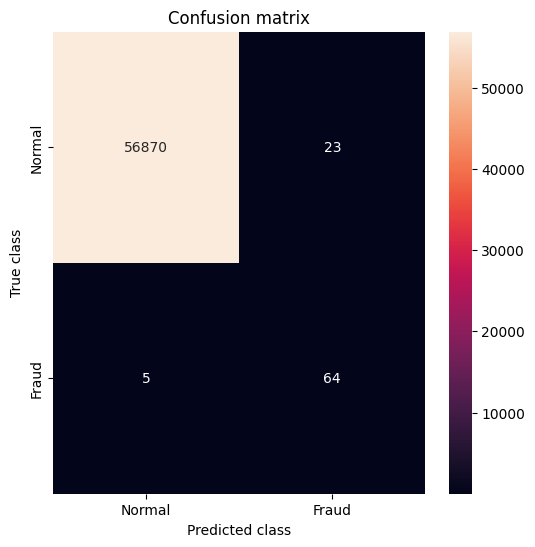

In [9]:
rfc = RandomForestClassifier()
# training
rfc.fit(X_train, Y_train)
# Testing
Y_pred_rf = rfc.predict(X_test)
# Evaluation
evaluate(Y_pred_rf, Y_test)


Accuracy:  0.9992275552122467
Precision:  0.735632183908046
Recall:  0.7529411764705882
F1-Score:  0.7441860465116279
AUC score:  0.8762683975430986
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56877
       Fraud       0.74      0.75      0.74        85

    accuracy                           1.00     56962
   macro avg       0.87      0.88      0.87     56962
weighted avg       1.00      1.00      1.00     56962



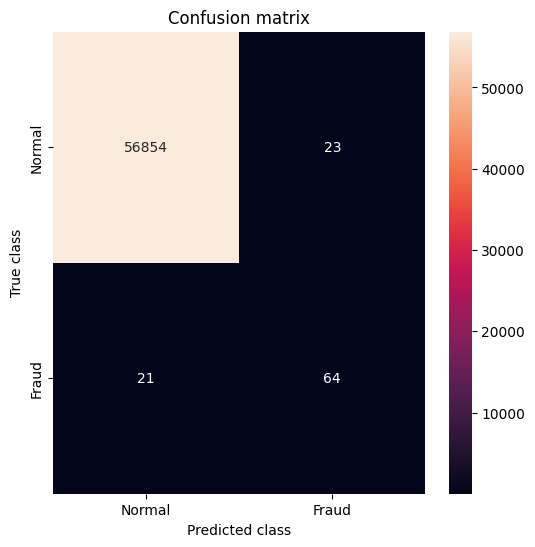

In [10]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, Y_train)
# predictions
Y_pred_dt_i = dtc.predict(X_test)
evaluate(Y_pred_dt_i, Y_test)

Accuracy:  0.9995259997893332
Precision:  0.735632183908046
Recall:  0.9411764705882353
F1-Score:  0.8258064516129032
AUC score:  0.9703861050167598
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00     56894
       Fraud       0.74      0.94      0.83        68

    accuracy                           1.00     56962
   macro avg       0.87      0.97      0.91     56962
weighted avg       1.00      1.00      1.00     56962



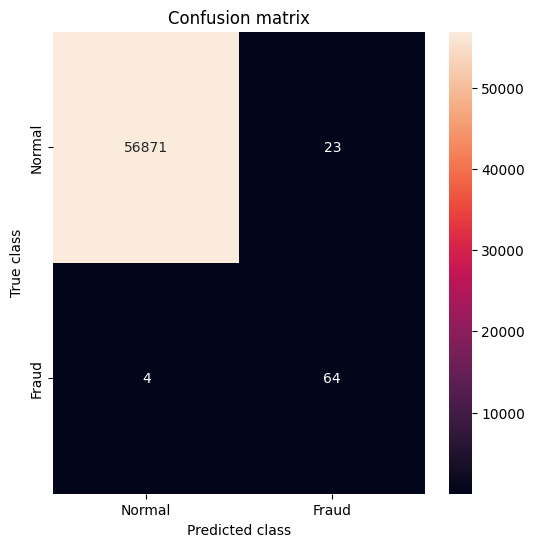

In [11]:
from sklearn.ensemble import RandomForestClassifier
# random forest model creation
rfb = RandomForestClassifier(class_weight='balanced')
rfb.fit(X_train, Y_train)
# predictions
Y_pred_rf_b = rfb.predict(X_test)
evaluate(Y_pred_rf_b, Y_test)
